# Tensorflow 1

## MNIST with one-hot encoding

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense, Input
from keras.models import Sequential
import matplotlib.pyplot as plt
import random
import numpy as np

2025-02-13 14:34:52.519751: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739475292.550772  508853 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739475292.555941  508853 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# get shape of x_train
x_train.shape

(60000, 28, 28)

In [4]:
# Reshape and normalize data
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train,num_classes=10)
y_test = keras.utils.to_categorical(y_test,num_classes=10)

In [5]:
# get shape of y_train
y_train.shape

(60000, 10)

In [6]:
# reshape y_train and y_test
y_train = y_train.reshape(60000, 10, 1)
y_test = y_test.reshape(10000, 10, 1)

In [7]:
y_train.shape

(60000, 10, 1)

In [8]:
# Create a simple model
model = Sequential([
    Input(shape = (28, 28,)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='sigmoid'),
])


I0000 00:00:1739475298.620263  508853 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2256 MB memory:  -> device: 0, name: NVIDIA T500, pci bus id: 0000:01:00.0, compute capability: 7.5


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# predict x[100]
model.predict(x_train[100:101])

I0000 00:00:1739475300.256847  508928 service.cc:148] XLA service 0x7fadb4003f70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739475300.256902  508928 service.cc:156]   StreamExecutor device (0): NVIDIA T500, Compute Capability 7.5
I0000 00:00:1739475300.304198  508928 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


I0000 00:00:1739475300.661131  508928 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


array([[0.47186345, 0.38173863, 0.52986956, 0.4104395 , 0.45331025,
        0.40092131, 0.49813646, 0.45292273, 0.37278062, 0.56418806]],
      dtype=float32)

In [11]:
# Compile the model
model.compile(optimizer='adam', loss=keras.losses.MSE)

In [12]:
# Train the model
history = model.fit(x_train, y_train, epochs=25, batch_size=512, validation_split=0.1)

Epoch 1/25


106/106 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0873 - val_loss: 0.0165
Epoch 2/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0177 - val_loss: 0.0107
Epoch 3/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0125 - val_loss: 0.0083
Epoch 4/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0098 - val_loss: 0.0070
Epoch 5/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0084 - val_loss: 0.0060
Epoch 6/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0073 - val_loss: 0.0055
Epoch 7/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0066 - val_loss: 0.0051
Epoch 8/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0057 - val_loss: 0.0047
Epoch 9/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0050 - val_loss: 0.0046
Epoch 10/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0045 - val_loss: 0.0047
Epoch 11/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 12/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]] [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


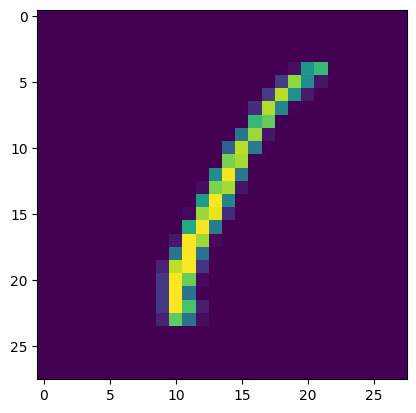

In [13]:
# Check random result

i = random.randint(0,x_test.shape[0])
print(np.round(model.predict(x_test[i:i+1])), y_test[i].T)
plt.imshow(x_test[i]);

In [14]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0044


0.0038258761633187532

In [15]:
y_test.shape

(10000, 10, 1)

In [16]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
y_test_pred = y_test.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_pred,y_pred)

0.9773

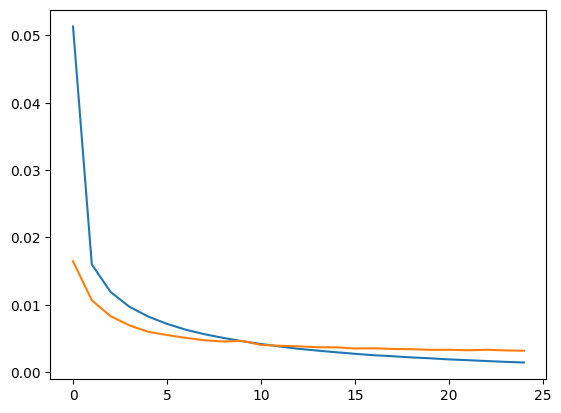

In [18]:
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);

## MNIST with sparse encoding

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import random
import numpy as np

In [27]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [28]:
# Reshape and normalize data
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255.0

In [29]:
y_train[100]

np.uint8(5)

In [47]:
# Create a simple model
# copy from before
model = Sequential([
    Input(shape = (28, 28,)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10),
])

In [48]:
model.predict(x_train[100:101])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


array([[ 0.14595675,  0.12016775, -0.2126973 , -0.00821362, -0.23643693,
         0.02607785, -0.21615893, -0.47494116,  0.6495906 ,  0.26484329]],
      dtype=float32)

In [53]:
# Compile the model
model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train the model
# copy from before

In [54]:
history = model.fit(x_train, y_train, epochs=25, batch_size=512, validation_split=0.1)

Epoch 1/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7284 - loss: 0.9941 - val_accuracy: 0.9322 - val_loss: 0.2453
Epoch 2/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9227 - loss: 0.2783 - val_accuracy: 0.9490 - val_loss: 0.1861
Epoch 3/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9397 - loss: 0.2159 - val_accuracy: 0.9598 - val_loss: 0.1553
Epoch 4/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9488 - loss: 0.1788 - val_accuracy: 0.9643 - val_loss: 0.1366
Epoch 5/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9587 - loss: 0.1486 - val_accuracy: 0.9660 - val_loss: 0.1248
Epoch 6/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9639 - loss: 0.1293 - val_accuracy: 0.9698 - val_loss: 0.1125
Epoch 7/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9693 - loss: 0.1102 - val_accuracy: 0.9702 - val_loss: 0.1040
Epoch 8/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9730 - loss: 0.0973 - val_accuracy:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
9 9


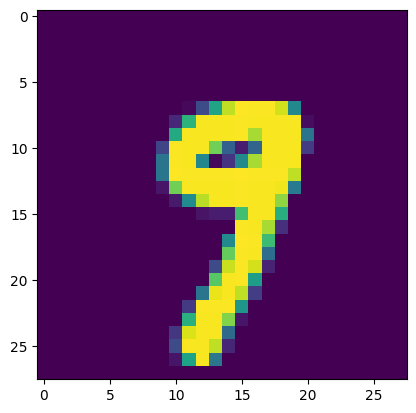

In [41]:
# test random input

i = random.randint(0,x_test.shape[0])
print(np.argmax(model.predict(x_test[i:i+1])), y_test[i].T)
plt.imshow(x_test[i]);

In [55]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9734 - loss: 0.0882


[0.07615980505943298, 0.9764999747276306]

In [56]:
y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9765

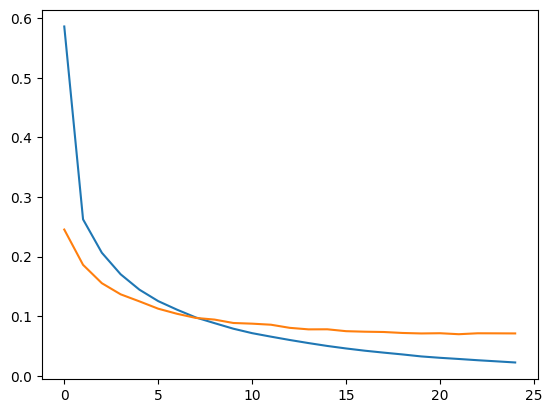

In [58]:
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);